# Inżynieria Uczenia Maszynowego

Studenci:
```
Bartłomiej Krawczyk
Mateusz Brzozowski
```

## Temat

> “Jakiś czas temu wprowadziliśmy konta premium, które uwalniają użytkowników od słuchania reklam. Nie są one jednak jeszcze zbyt popularne – czy możemy się dowiedzieć, które osoby są bardziej skłonne do zakupu takiego konta?”


# Szczegółowy opis tematu
W ramach projektu wcielamy się w rolę analityka pracującego dla portalu „Pozytywka” -
serwisu muzycznego, który swoim użytkownikom pozwala na odtwarzanie ulubionych utworów
online. Praca na tym stanowisku nie jest łatwa - zadanie dostajemy w formie enigmatycznego opisu
i to do nas należy doprecyzowanie szczegółów tak, aby dało się je zrealizować. To oczywiście
wymaga zrozumienia problemu, przeanalizowania danych, czasami negocjacji z szefostwem.
Same modele musimy skonstruować tak, aby gotowe były do wdrożenia produkcyjnego -
pamiętając, że w przyszłości będą pojawiać się kolejne ich wersje, z którymi będziemy
eksperymentować.

Jak każda szanująca się firma internetowa, Pozytywka zbiera dane dotyczące swojej działalności - są to:

- lista dostępnych artystów i utworów muzycznych,
- baza użytkowników,
- historia sesji użytkowników,
- techniczne informacje dot. poziomu cache dla poszczególnych utworów.

(analitycy mogą wnioskować o dostęp do tych informacji na potrzeby realizacji zadania)

# Problem biznesowy

## Określenie celu biznesowego

### Opis kontekstu
Portal "Pozytywka" oferuje użytkownikom możliwość odtwarzania ulubionych utworów online, zarówno w wersji darmowej, jak i wersji premium. Firma chce przekonać użytkowników, że warto płacić za konto premium i zwiększyć liczbę osób, które decydują się na zakup takiego konta. Aby zachęcić użytkowników do zakupu konta premium, niezbędne są dane dotyczące ich skłonności do wykonywania tej akcji. Pozwolą one na precyzyjne dostosowanie działań marketingowych.

### Zdefiniowanie celów biznesowych.
Celem biznesowym jest zwiększenie liczby użytkowników korzystających z konta premium, co przyczyni się do zwiększenia przychodów serwisu "Pozytywka". Chcemy stworzyć model, który pozwoli nam na przewidywanie, którzy użytkownicy są bardziej skłonni do zakupu konta premium, aby móc ich nakłonić do zakupu. Model powinien działać na bieżąco, a jego wyniki powinny być użyte do podejmowania decyzji biznesowych, takich jak targetowanie reklam odtwarzanych użytkownikom non-premium.

### Biznesowe kryterium sukcesu.
- Wzrost liczby użytkowników premium - sukces będzie mierzony wzrostem liczby użytkowników premium po wdrożeniu modelu predykcyjnego.
- Zwiększenie przychodów - sukces będzie mierzony wzrostem przychodów portalu po wdrożeniu modelu predykcyjnego.
- Zmniejszenie kosztów kampanii reklamowych promującej premium, poprzez targetowanie ich na użytkowników z większą skłonnością do zakupu konta premium.
- Interwencja
    - W ramach wydzielonej grupy użytkowników, wyliczamy dla każdej osoby na podstawie jego danych sesji z miesiąca, czy jest skłony kupić premium kiedykolwiek lub w przeciągu najbliższych 30 dni.
    - Dla każdego użytkownika na podstawie jego danych, przewidujemy używając Explainable AI, który skorzysta z naszych wartości symulowanych, wskaże nam, które wartości należy zmodyfikować.
- Eksperymenty A/B:
    - Dzielimy wszystkich użytkowników na dwie podgrupy - jedna nadal korzysta z portalu w sposób niezmieniony, a druga podgrupa korzysta z portalu z zastosowaniem naszego modelu. Dzięki takiemu podziałowi będziemy mogli przeprowadzić analityczne porównanie wyników sprzedaży kont premium między tymi dwiema podgrupami i dokładnie ocenić skuteczność działania naszego modelu.

## Określenie celów modelowania.
### Opis zadań modelowania.
W ramach tego zadania analitycznego zajmujemy się **klasyfikacją binarną** użytkowników portalu "Pozytywka" na podstawie danych zebranych w pewnym okresie. Naszym celem jest określenie, czy dany użytkownik kupi konto premium, czy nie. W pierwszej kolejności dokonujemy agregacji tych danych i tworzymy z nich wektory cech dla każdego użytkownika. Następnie wykorzystujemy różne modele klasyfikacyjne, takie jak np. regresja logistyczna czy drzewa decyzyjne, aby przewidzieć, czy użytkownik kupi konto premium, czy też nie.
### Definicja kryteriów sukcesu z perspektywy analitycznej.
Analityczne kryterium sukcesu będzie wyznaczane na podstawie danych dostarczonych przez klienta (danych offline), tak abyśmy mogli zweryfikować nasz model przed wdrożeniem.
Wśród wszystkich użytkowników, których otrzymaliśmy, około 50% to użytkownicy premium.
Po usunięciu sesji użytkowników premium procent miesięcznych sesji użytkowników, o których mamy informację, że kiedykolwiek kupią premium wynosi 25%. Natomiast procent miesięcznych sesji użytkowników, o których mamy informację, że kupią w przeciągu 30 dni premium wynosi 2%.
Oznacza to, że jeżeli skorzystalibyśmy z naiwnego klasyfikatora, który przypisywał by wszystkim grupę większościową, to otrzymalibyśmy odpowiednio 75% i 98% skuteczności. Tak więc naszym analitycznym kryterium sukcesu będzie poprawa tego wyniku.
Dodatkowo będziemy w stanie wyjaśnić, z czego wynika przekonanie. 

## Ocena aktualnej sytuacji.

### Spis dostępnych zasobów.
- Lista dostępnych artystów i utworów muzycznych.
- Baza 20 tyś. użytkowników z 50 tyś. wszystkich osób korzystających z platformy
- Historia sesji użytkowników.
- Techniczne informacje dotyczące poziomu cache dla poszczególnych utworów.
### Założenia:
- Kupiona usługa premium jest trwała i nie ma potrzeby jej ponownego zakupu.
- Polubienie piosenek jest jednorazowe i utrzymuje się przez cały okres użytkowania platformy.
- Dane są agregowane dla miesięcznych okien czasowych.
- Użytkownicy, którzy nie posiadają konta premium, mają zazwyczaj mniejszy stosunek czasu słuchania muzyki do czasu odtwarzania reklam niż użytkownicy posiadający konto premium. W związku z tym, jeśli bierzemy pod uwagę sesje użytkowników, którzy już zakupili premium, mogłoby to wpłynąć na wyniki modelu i sugerować zmniejszenie ilości odtwarzanych reklam tylko po to, aby użytkownicy zdecydowali się na zakup konta premium. Aby uniknąć takiej sytuacji, sesje użytkowników, którzy już zakupili konto premium, nie będą brane pod uwagę w procesie trenowania modelu klasyfikacji.
- Nie ma ograniczeń na ilość reklam, które można wyświetlić w danym czasie, ponieważ platforma może sama reklamować swoje usługi premium.
### Ograniczenia:
- Posiadamy dane dotyczące tylko 40% użytkowników korzystających z platformy.
- Posiadamy dane z sesji sprzed 3 lat.
- Model klasyfikacji opiera się tylko na danych zgromadzonych wewnątrz platformy, nie uwzględniając zewnętrznych czynników wpływających na decyzje użytkowników.
- Działamy tylko na historii danych dostępnych do końca danego okresu.

### Wstępne propozycje narzędzi i metod.
- Python - Język programowania.
- Spark - Dostarcza prosty sql'owy dostęp, co ułatwia pracę z dużymi zbiorami danych.
- Pandas  - Biblioteka Pythona do manipulacji i analizy danych. Umożliwia łatwe wczytywanie danych z różnych źródeł, manipulowanie nimi oraz przeprowadzanie analizy danych.
- Scikit-learn (sklearn) - Biblioteka Pythona udostępniająca wiele algorytmów uczenia maszynowego, a także narzędzia do oceny modeli. 
- XAI: Explainable AI - W kolejnym etapie będziemy chcieli skupić się na wyjaśnieniu, dlaczego użytkownik chce zakupić premium i czy jesteśmy w stanie przekonać go do takiej decyzji.

## Analiza Danych


```mermaid
erDiagram
    ARTIST {
        string id
        string name
        array-string genres
    }

    SESSION {
        int session_id
        int user_id
        string track_id
        string event_type
        timestamp timestamp
    }


    TRACK {
        string id
        string id_artist
        
        string name
        bigint duration_ms
        
        string release_date

        bigint explicit
        bigint key
        bigint popularity
        
        double acousticness
        double danceability
        double energy
        double instrumentalness
        double liveness
        double loudness
        double speechiness
        double tempo
        double valence
    }

    ARTIST ||--o{ TRACK: creates
    TRACK ||--|| TRACK_STORAGE : stores
    SESSION }o--o| TRACK: plays


    TRACK_STORAGE {
        string track_id
        string storage_class
        double daily_cost
    }

    USER {
        int user_id
        boolean premium_user
        string name
        string city
        array-string favourite_genres
    }

    USER ||--o{ SESSION : listens_to
```

Informacje od klienta:
- System oferuje tylko jedną ofertę konta premium
- Konta premium nie można dzielić
- System obsługuje obecnie ok. 50 tys. użytkowników
- Reklamy zmieniają się w zależności od konkretnych umów z innymi podmiotami. Za dobór częstotliwości reklam odpowiada nasz autorski algorytm.
- Dane dostępne są w formacie plików JSON.
- Dane są uwspólnione, a ew. różnice wynikające ze sposobu ich zbierania zostały usunięte.
- Nie posiadamy takiego systemu, który stara się przewidzieć kto jest skłonny do zakupu konta premium
- Klient jest naszym ekspertem domenowym

### Dane V1

[Quality Report V1](./quality_check/v1/quality_v1.pdf)

Błędy w danych:
- W kolumanch znajduje się dużo identyfikatorów o "id": -1.
- W pliku sessions.jsonl mamy null'e w kolumnie "user_id"
- Favourite_genres zawiera rekordy null
- "premium_user" zawiera rekordy null. W tej kolumnie nie widzimy wartości false.
- 5 użytkowników ma pole o nazwie "id"
- W sessions, user_id oraz track_id są nullami, szczególnie gdy event_type jest ustawione na ADVERTISEMENT lub BUY_PREMIUM.
- event_type zawiera rekordy null
- Tylko 4 rekordy dla przypadku "FAST"
- W tracks, acousticness, danceability, speechiness, tempo, valence, energy są zerami
- W tracks kolumny id, id_artists zaeirają nulle
- W sessions jest mało rekordów zawierających wystąpienia pól ADVERTISEMENT i BUY_PREMIUM
- Dane z krótkiego okresu działania funkcji PREMIUM
- Średnia głośność (loudness) w decybelach, typowo od -60 do 0dB, dane posiadają zakres od -60 do 4.8 dB.

Wnioski wyciągnięte na podstawie danych, a także informacje dostarczone przez klienta:
- Posiadamy dostęp do danych ok. 20k użytkowników
- Reklamy są przechowywane w chmurze.
- Kolumna key: liczby w https://en.wikipedia.org/wiki/Pitch_class
- Kolumna instrumentalness: przewidywanie czy utwór posiada wokal, im bliżej 1.0 tym wyższe prawdopodobieństwo, że utwór jest instrumentalny. Wartości powyżej 0.5 można traktować jak utwory instrumentalne
- Przewidzenie czy dany użytownik jest skłonny do zakupu takiego konta
- Możecie Państwo sami ustalić format danych przyjmowanych/odsyłanych
- Określenie przynależności danego użytkownika


### Dane V2
[Quality Report V2](./quality_check/v2/quality_v2.pdf)

Wnioski wyciągnięte na podstawie danych, a także informacje dostarczone przez klienta:
- BUY_PREMIUM jest dożywotnie
- polubienie piosenki jest jest jednorazowe i dożywotnie
- nie mamy informacji o gatunkach per utwór, tak więc zakładamy, że jeśli dany artysta tworzy muzykę w danym gatunku, to jego wszystkie utwory należą do tych samych gatunków
- System pozwala dodać piosenki o takiej samej nazwie
- System pozwala założyć konta artystom o tej samej nazwie
- Artyści mogą maksymalnie wstawiać utwory o długości trwania poniżej 2h
- release_date jest czasami datą w formacie YYYY-MM-DD, a czasami YYYY
- instrumentalness równe 0.0 w 46190 przypadków i oznacza, że algorytmy są pewne, że piosenka zawiera wokal
- w popularity występuje pik w 0.0, większość piosenek nie jest zbyt popularna
- track_id = '' w przypadku reklam (1288318 przypadków) oznacza, że reklama pochodzi z chmury i nie mamy informacji o tej reklamie
- 118940 utworów muzycznych nigdy nie było odsłuchane, są mało popularne
- na potrzeby tego projektu użytkownicy są jedynie z największych miast w polsce?
- W tabeli artyści zdefiniowanych jest 3912 unikalnych gatunków muzyki, a wśród udostępnionych użytkowników występuje jedynie 50 z tych gatunków. Dla wielu z gatunków mamy tak mało danych, że preferujemy skupić się na najbardziej popularnych gatunkach muzycznych

Błędy w danych:
- Występuje 41 rekordów loudness o wartościach większych niż 0.0.
- tempo równe 0.0 w 48 przypadkach

In [1]:
import pandas as pd
import os
from IPython.display import display

## Wstępny zbiór treningowy

Na ten moment mamy przygotowane dwie kolumny pomagające określić to jakie mogą być zamiary użytkownika, na podstawie miesiąca:

Pierwsza `premium_user_numerical` mówiąca nam, czy użytkownik kiedykolwiek kupi premium oraz druga `will_buy_premium_next_month_numerical` przedstawiająca to czy użytkownik zakupi premium w przeciągu następnych 30 dni.

Przygotowaliśmy różne cechy naszych danych, na podstawie których postaramy się sklasyfikować użytkowników:
- `number_of_advertisements`, ilość odtworzonych reklam w danym miesiącu
- `number_of_tracks`, ilość przesłuchanych utworów w danym miesiącu
- `number_of_skips`, ilość pominiętych utworów w danym miesiącu
- `number_of_likes`, liczba danych lików w danym miesiącu
- `number_of_liked_tracks_listened`, liczba przesłuchanych utworów w danym miesiącu, które w momencie odtworzenia były polubione
- `number_of_tracks_in_favourite_genre`, liczba przesłuchanych utworów z ulubionego gatunku u danym miesiącu
- `total_number_of_favourite_genres_listened`, liczba przesłuchanych gatunków w danym miesiącu należących do twoich ulubionych
- `average_popularity_in_favourite_genres`, średnia popularność utworów wśród ulubionych gatunków w danym miesiącu
- `total_tracks_duration_ms`, całkowity czas przesłuchanych utworów w danym miesiącu
- `number_of_different_artists`, ilość przesłuchanych artystów w danym miesiącu
- `average_release_date`, średnia data przesłuchanych piosenek w danym miesiącu
- `average_duration_ms`, średni czas trwania utworów przesłuchanych w danym miesiącu
- `explicit_tracks_ratio`, średnia ilość "wulgarnych" utworów przesłuchanych w danym miesiącu
- `average_popularity`, średnia popularność przesłuchanych utworów w danym miesiącu
- `average_acousticness`, średnia akustyka przesłuchanych utworów w danym miesiącu
- `average_danceability`, średnia taneczność przesłuchanych utworów w danym miesiącu
- `average_energy`, średnia moc przesłuchanych utworów w danym miesiącu
- `average_instrumentalness`, średnia ilość utworów z wokalem przesłuchanych w danym miesiącu
- `average_liveness`, średnie brzmienie utworów na żywo przesłuchanych w danym miesiącu
- `average_loudness`, średnia głośność przesłuchanych utworów w danym miesiącu
- `average_speechiness`, średnia ilość wokalu w utworach przesłuchanych w danym miesiącu
- `average_tempo`, średnia prędkość przesłuchanych utworów w danym miesiącu
- `average_valence`, średnia emocjonalność przesłuchanych utworów w danym miesiącu
- `average_track_name_length`, średnia długość nazwy utworów przesłuchanych w danym miesiącu
- `average_daily_cost`, średni koszt utrzymania przesłuchanych piosenek w danym miesiącu

Wyżej wymienione cechy, a także ich implementacja znajdują się w folderze `features`, tam też znajduje się wyniki.

In [2]:
FEATURE_VERSION = 'v1'

TARGET = [
    "premium_user_numerical",
    "will_buy_premium_next_month_numerical"
]

FEATURES = [
    'number_of_advertisements',
    'number_of_tracks',
    'number_of_skips',
    'number_of_likes',
    'number_of_liked_tracks_listened',
    'number_of_tracks_in_favourite_genre',
    'total_number_of_favourite_genres_listened',
    'average_popularity_in_favourite_genres',
    'total_tracks_duration_ms',
    'number_of_different_artists',
    'average_release_date',
    'average_duration_ms',
    'explicit_tracks_ratio',
    'average_popularity',
    'average_acousticness',
    'average_danceability',
    'average_energy',
    'average_instrumentalness',
    'average_liveness',
    'average_loudness',
    'average_speechiness',
    'average_tempo',
    'average_valence',
    'average_track_name_length',
    'average_daily_cost'
]

In [3]:
feature_path = os.path.join('features', FEATURE_VERSION, 'feature.csv')
dataframe = pd.read_csv(feature_path)

### Przykładowe wartości cech i targetów

In [4]:
display(dataframe)

,user_id,year,month,premium_user_numerical,will_buy_premium_next_month_numerical,number_of_premium,number_of_advertisements,number_of_tracks,number_of_skips,number_of_likes,...,average_danceability,average_energy,average_instrumentalness,average_liveness,average_loudness,average_speechiness,average_tempo,average_valence,average_track_name_length,average_daily_cost
0,212,2020,2,1,0,0,10,30,16,8,...,0.542767,0.600467,0.094653,0.179113,-10.158167,0.049070,121.964467,0.588167,22.233333,0.012134
1,212,2020,7,1,0,0,5,16,8,2,...,0.499000,0.675250,0.150966,0.226225,-8.795062,0.061812,123.069063,0.452131,22.687500,0.014780
2,212,2020,1,1,0,0,14,39,21,12,...,0.487000,0.691667,0.119363,0.235690,-9.491795,0.064918,123.745769,0.564369,19.461538,0.012399
3,212,2020,3,1,0,0,3,20,9,6,...,0.516700,0.637150,0.069641,0.189545,-8.409150,0.053715,121.415600,0.586000,21.250000,0.012706
4,212,2020,8,1,0,0,13,40,22,12,...,0.513525,0.642350,0.112645,0.285203,-9.562400,0.055282,120.922325,0.510517,24.000000,0.013076
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
182383,5243,2020,2,1,0,0,0,1,1,1,...,0.572000,0.267000,0.494000,0.115000,-17.321000,0.033400,76.492000,0.557000,16.000000,0.008329
182384,17786,2020,2,0,0,0,0,5,0,3,...,0.646000,0.566200,0.052408,0.110080,-5.643600,0.122320,111.356200,0.454600,11.600000,0.020058
182385,16683,2020,1,0,0,0,0,5,0,1,...,0.632200,0.572200,0.002088,0.111140,-7.618400,0.184300,107.643000,0.358000,13.400000,0.018462
182386,18570,2019,11,0,0,0,0,5,0,0,...,0.681800,0.506400,0.099401,0.173480,-9.415000,0.124900,102.137200,0.486800,15.000000,0.032794


In [5]:
TARGET_AND_FEATURES = TARGET + FEATURES

### Macierz korelacji cech z wartościami przewidywanymi

Posłuży nam do wybierania cech które nie są zbytnio skorelowane między sobą, a za to są skorelowane z targetem

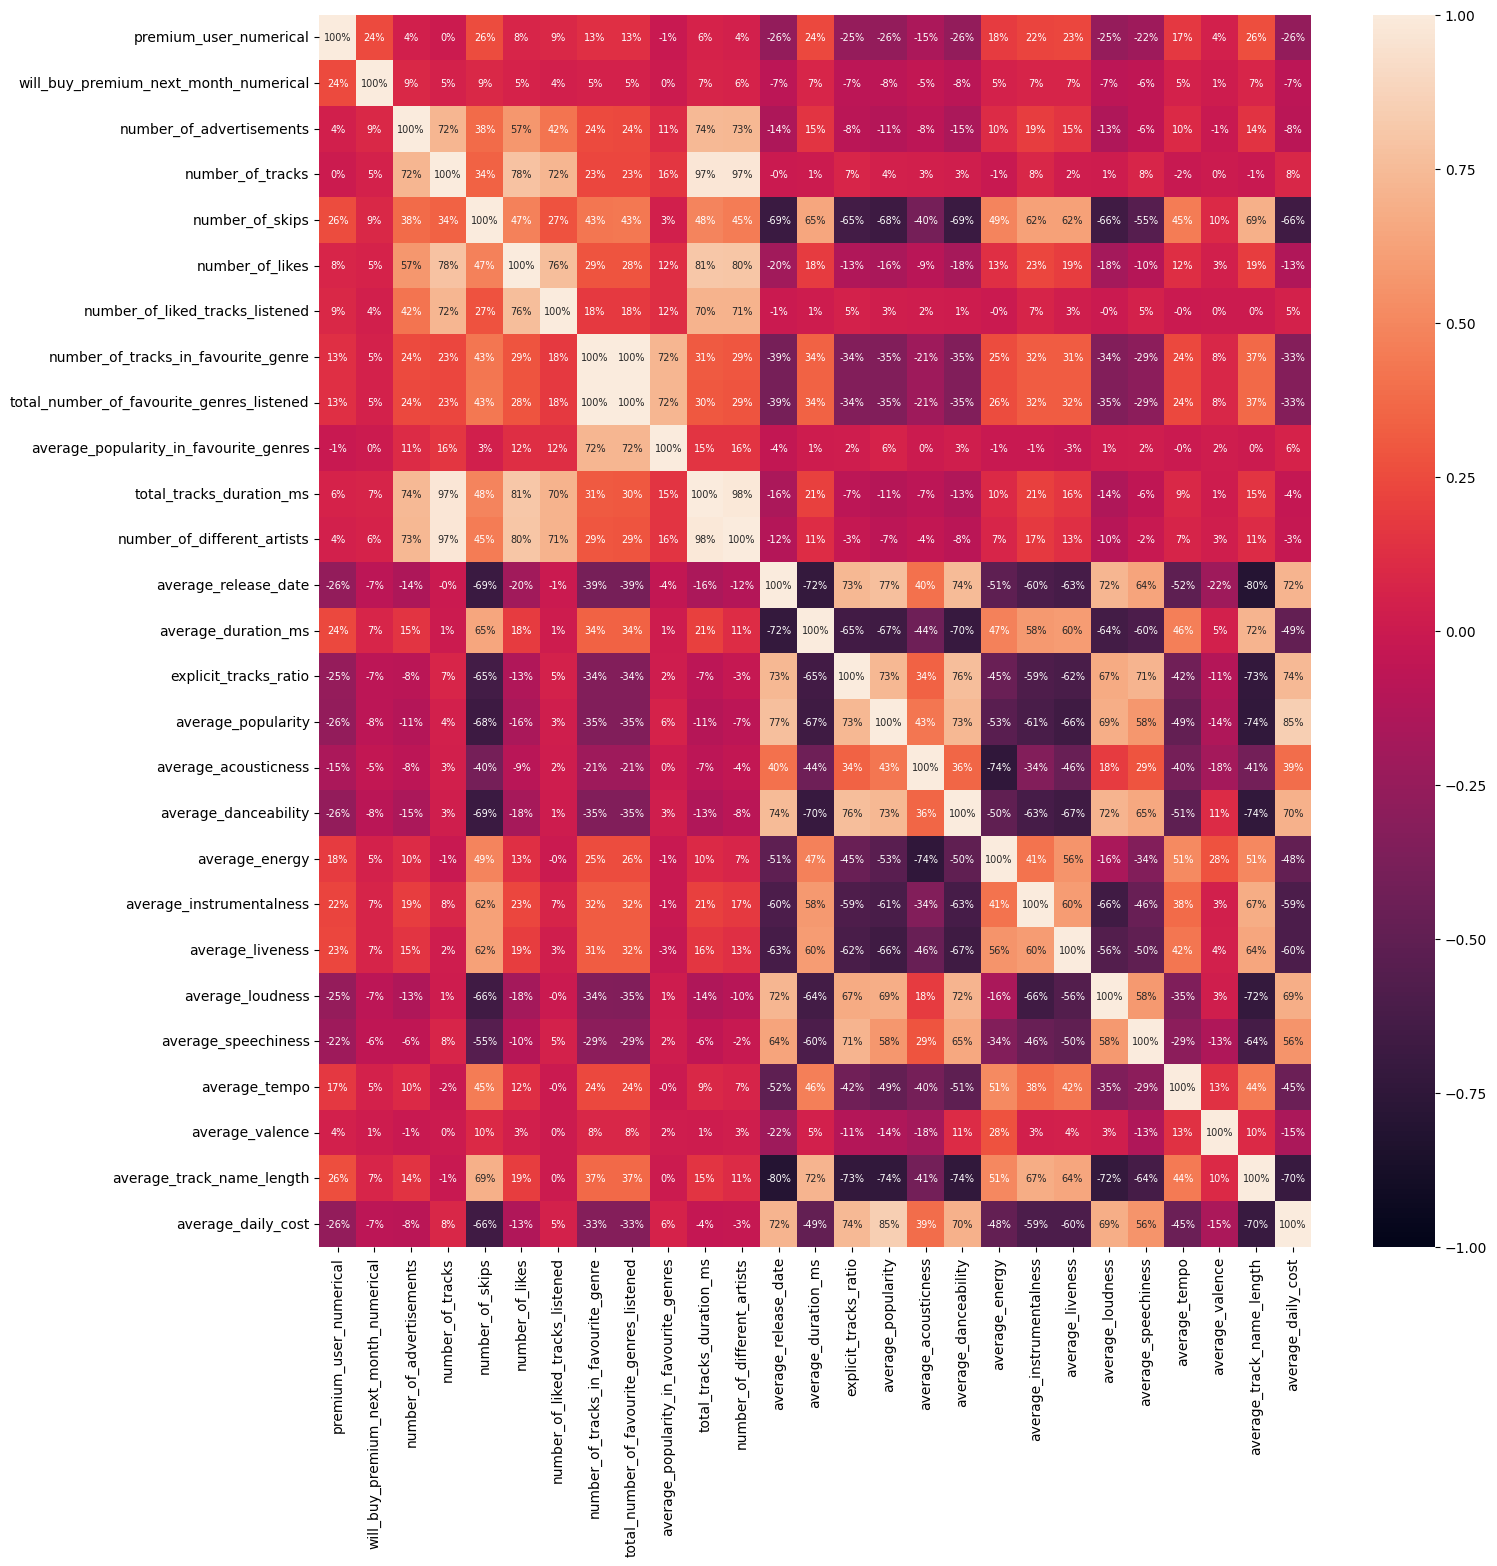

In [13]:
import seaborn as sns
from matplotlib import pyplot as plt

correlation_matrix = dataframe.loc[:, TARGET_AND_FEATURES].corr(method='spearman')

plt.figure(figsize = (16,16))

sns.heatmap(
    correlation_matrix,
    xticklabels=correlation_matrix.columns,
    yticklabels=correlation_matrix.columns,
    annot=True,
    annot_kws={"fontsize": 7},
    fmt=".0%",
    vmin=-1,
    vmax=1,
)

plt.show()

# Przykładowy model opierający się na prostej regresji logistycznej

In [8]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split


for target in TARGET:
    x_train, x_test, y_train, y_test = train_test_split(dataframe.loc[:, FEATURES], dataframe.loc[:, target], test_size=0.33)
    model = LogisticRegression()
    model.fit(x_train, y_train)
    print(target)
    display(dataframe[target].value_counts(normalize=True))
    print('train_set_score = ', model.score(x_train, y_train))
    print('test_set_score = ', model.score(x_test, y_test))

premium_user_numerical


0    0.740931
1    0.259069
Name: premium_user_numerical, dtype: float64

train_set_score =  0.7409471435936464
test_set_score =  0.7393211384139959
will_buy_premium_next_month_numerical


0    0.979763
1    0.020237
Name: will_buy_premium_next_month_numerical, dtype: float64

train_set_score =  0.9796070344274503
test_set_score =  0.9800628021731546


Posiadamy mocno niezbalansowane dane treningowe, ponieważ po agregacji ucięliśmy historię użytkowników premium w momencie zakupu usługi. Możemy to zauważyć na podstawie procentowego stosunku osób które kupią premium, a także osób które zakupią premium w przeciągu 30 dni.

Analizując wynik działania regresji liniowej możemy wywnioskować, że nasz model niczego się nie nauczył, ponieważ skuteczność na obu zbiorach jest porównywalna z naiwnym klasyfikatorem, przypisującym wszystkim rekordom wartość 0.

W kolejnym etapie postaramy sie poprawić te wyniki - spróbujemy:
- dodać nowe cechy na podstawie danych
- usunąć zbędne cechy
- zbalansować / znormalizować dane
- skorzystać z innych modeli poza regresją liniową